In [ ]:
#Linear Regression Model to predict Car Prices

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import copy

# Load and prepare data
initial_data = pd.read_csv('C:\\Users\\Savita\\Downloads\\CarPrices\\CarPrice_Assignment.csv', encoding='utf-8')
data = pd.read_csv('C:\\Users\\Savita\\Downloads\\Encoded_CarPrice_Assignment.csv', encoding='utf-8')
initial_data.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


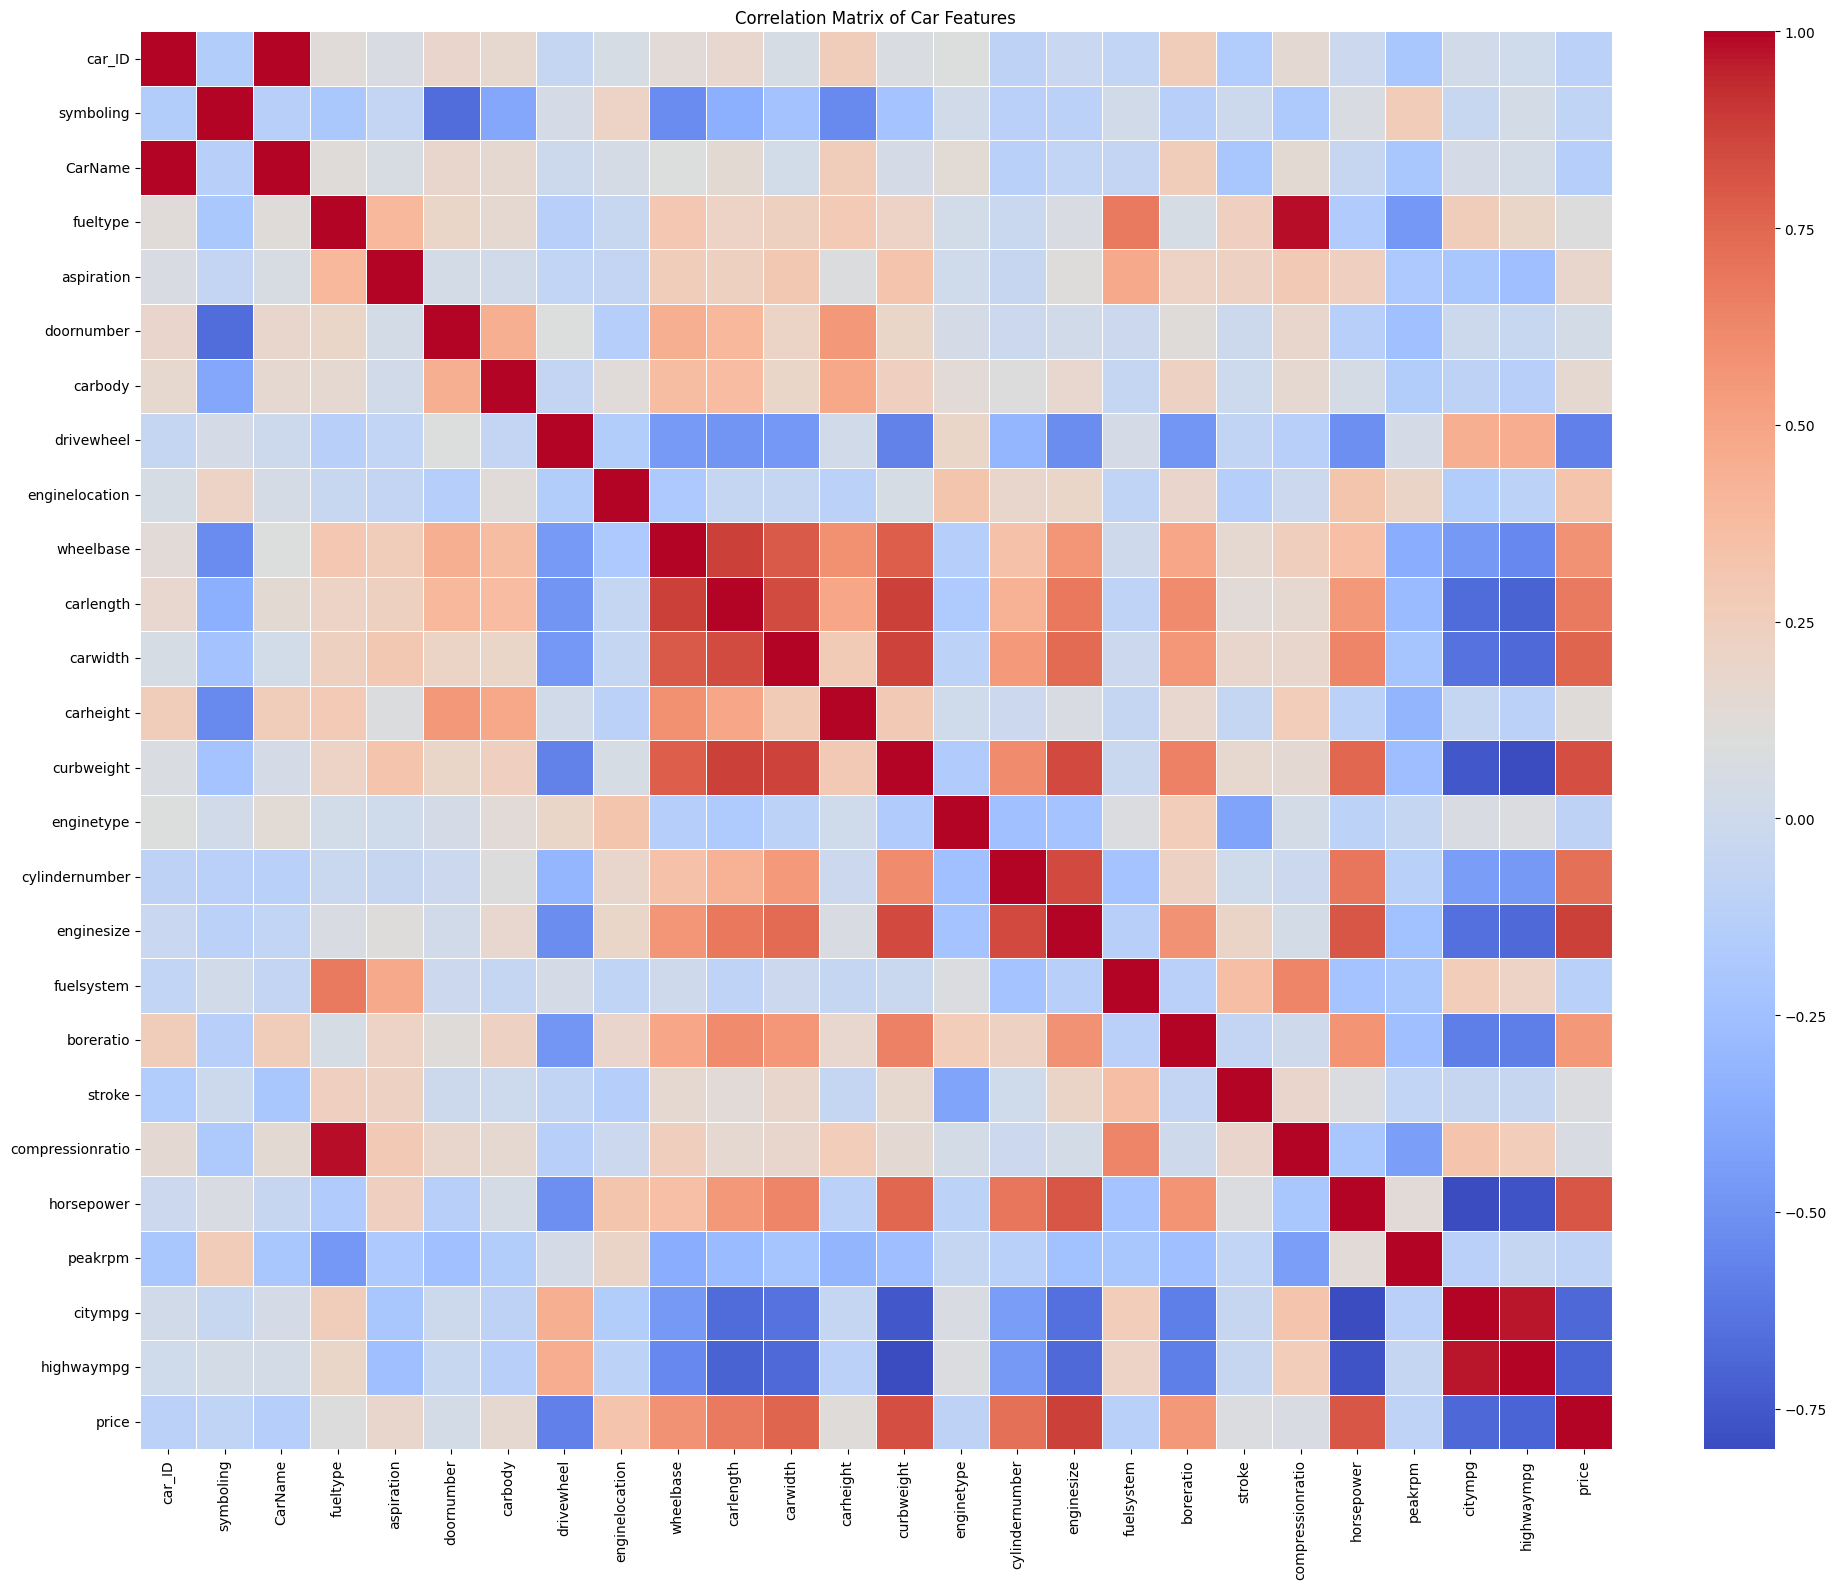

In [45]:
# Correlation matrix
plt.figure(figsize=(20, 16))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Car Features')
plt.tight_layout()
plt.show()

In [46]:
# Prepare x_train and y_train
x_train = data.iloc[:, :-1].values
y_train = data.iloc[:, -1].values

print("Type of x_train:",type(x_train))
print("Type of y_train:",type(y_train))
print('The shape of x_train is:', x_train.shape)
print('The shape of y_train is: ', y_train.shape)
print('Number of training examples (m):', len(x_train))

Type of x_train: <class 'numpy.ndarray'>
Type of y_train: <class 'numpy.ndarray'>
The shape of x_train is: (205, 25)
The shape of y_train is:  (205,)
Number of training examples (m): 205


In [48]:
# Feature scaling
def normalize_features(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std, mean, std

x_train_norm, mean, std = normalize_features(x_train)

# Initialize parameters
def initialize_parameters(n_features):
    return np.zeros(n_features), 0

w, b = initialize_parameters(x_train_norm.shape[1])

# Compute cost
def compute_cost(X, y, w, b):
    m = X.shape[0]
    predictions = np.dot(X, w) + b
    cost = np.sum((predictions - y) ** 2) / (2 * m)
    return cost

# Compute gradient
def compute_gradient(X, y, w, b):
    m, n = X.shape
    predictions = np.dot(X, w) + b
    dj_dw = np.dot(X.T, (predictions - y)) / m
    dj_db = np.sum(predictions - y) / m
    return dj_dw, dj_db

# Gradient descent
def gradient_descent(X, y, w_init, b_init, alpha, num_iters):
    w = copy.deepcopy(w_init)
    b = b_init
    cost_history = []

    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(X, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        
        if i % 100 == 0:
            cost = compute_cost(X, y, w, b)
            cost_history.append(cost)
            print(f"Iteration {i:4d}: Cost {cost:8.2f}")
    
    return w, b, cost_history

# Train the model
alpha = 0.01
iterations = 1000
w_final, b_final, J_history = gradient_descent(x_train_norm, y_train, w, b, alpha, iterations)

# Make predictions
def predict(X, w, b):
    return np.dot(X, w) + b

y_pred = predict(x_train_norm, w_final, b_final)

# Calculate R-squared
def r_squared(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

r2 = r_squared(y_train, y_pred)
print(f"R-squared: {r2:.4f}")

Iteration    0: Cost 114545069.42
Iteration  100: Cost 15687463.38
Iteration  200: Cost 5363437.32
Iteration  300: Cost 3936385.58
Iteration  400: Cost 3711795.76
Iteration  500: Cost 3656966.74
Iteration  600: Cost 3629764.45
Iteration  700: Cost 3609234.34
Iteration  800: Cost 3591599.43
Iteration  900: Cost 3575822.09
R-squared: 0.8878


In [49]:
# Print all predictions and target values
print("\nPredictions vs Target Values:")
for pred, target in zip(y_pred, y_train):
    print(f"Prediction: {pred:0.2f}, Target value: {target}")


Predictions vs Target Values:
Prediction: 14499.88, Target value: 13495.0
Prediction: 14488.08, Target value: 16500.0
Prediction: 19476.83, Target value: 16500.0
Prediction: 13696.16, Target value: 13950.0
Prediction: 16100.45, Target value: 17450.0
Prediction: 16224.26, Target value: 15250.0
Prediction: 21132.29, Target value: 17710.0
Prediction: 20974.55, Target value: 18920.0
Prediction: 22704.17, Target value: 23875.0
Prediction: 18330.68, Target value: 17859.167
Prediction: 15140.72, Target value: 16430.0
Prediction: 14840.54, Target value: 16925.0
Prediction: 18646.98, Target value: 20970.0
Prediction: 18872.83, Target value: 21105.0
Prediction: 21600.39, Target value: 24565.0
Prediction: 26721.98, Target value: 30760.0
Prediction: 27259.79, Target value: 41315.0
Prediction: 30573.80, Target value: 36880.0
Prediction: 1295.05, Target value: 5151.0
Prediction: 7635.12, Target value: 6295.0
Prediction: 7256.37, Target value: 6575.0
Prediction: 7268.30, Target value: 5572.0
Predict

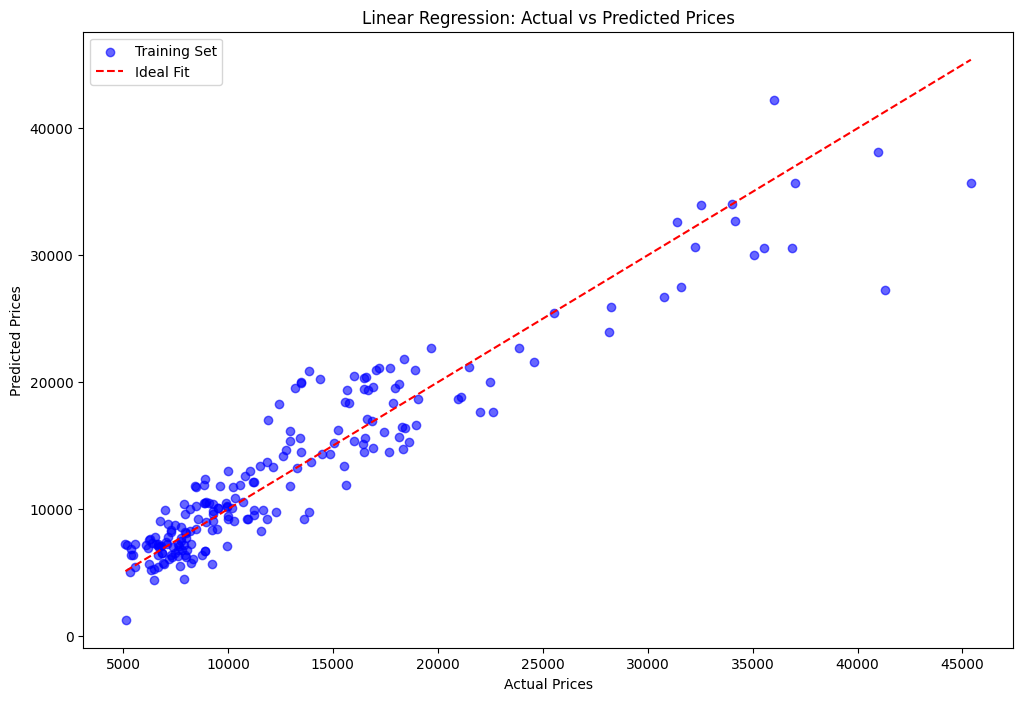

In [55]:
# Plotting
plt.figure(figsize=(12, 8))
plt.scatter(y_train, y_pred, color='blue', alpha=0.6, label='Training Set')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression: Actual vs Predicted Prices')
plt.legend()
plt.show()

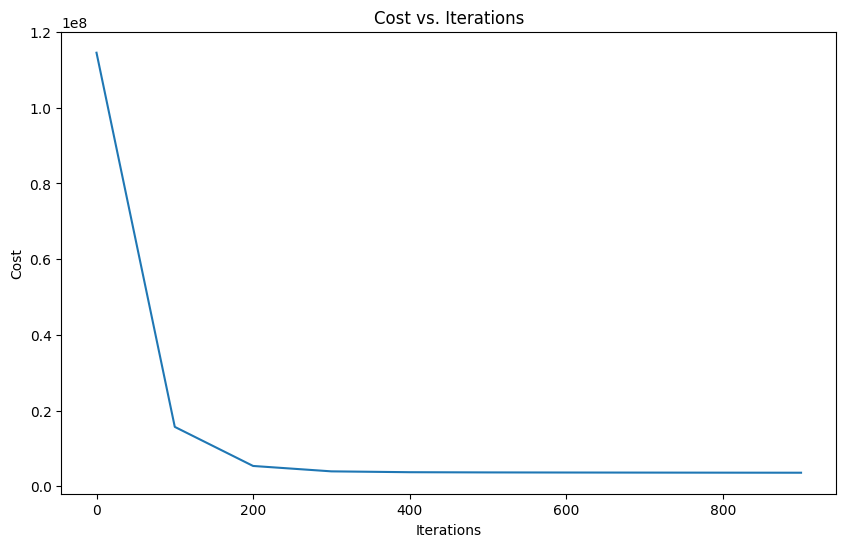

In [51]:
# Plot cost history
plt.figure(figsize=(10, 6))
plt.plot(range(0, iterations, 100), J_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Iterations')
plt.show()

In [52]:
# Feature importance
feature_importance = pd.DataFrame({'feature': data.columns[:-1], 'importance': abs(w_final)})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
             feature   importance
16        enginesize  2245.111749
8     enginelocation  1541.841477
11          carwidth  1237.711263
13        curbweight  1189.105418
21        horsepower  1122.291226
15    cylindernumber   847.178672
7         drivewheel   713.925821
0             car_ID   698.414958
9          wheelbase   658.057956
2            CarName   528.549162
22           peakrpm   447.187903
19            stroke   434.787611
12         carheight   396.091041
17        fuelsystem   390.730699
3           fueltype   382.463471
20  compressionratio   359.685556
6            carbody   331.978297
1          symboling   248.525278
14        enginetype   206.378873
10         carlength   165.530543
4         aspiration   158.435219
23           citympg    72.144910
5         doornumber    55.452174
24        highwaympg    14.194128
18         boreratio     2.469482
